In [50]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn.cluster import KMeans

In [52]:
segment_directory = "d:\\temp\\Xsolla2.csv"

segment = pd.read_csv(segment_directory, header=0 )


In [53]:
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


In [54]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(segment[['Monetary' ,'Frequency'
                                       ,'factor_1' ,'factor_3' , 'factor_4']].values)
segment['pca-one'] = pca_result[:,0]
segment['pca-two'] = pca_result[:,1] 
segment['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99573744e-01 4.18501770e-04 2.61992820e-06]


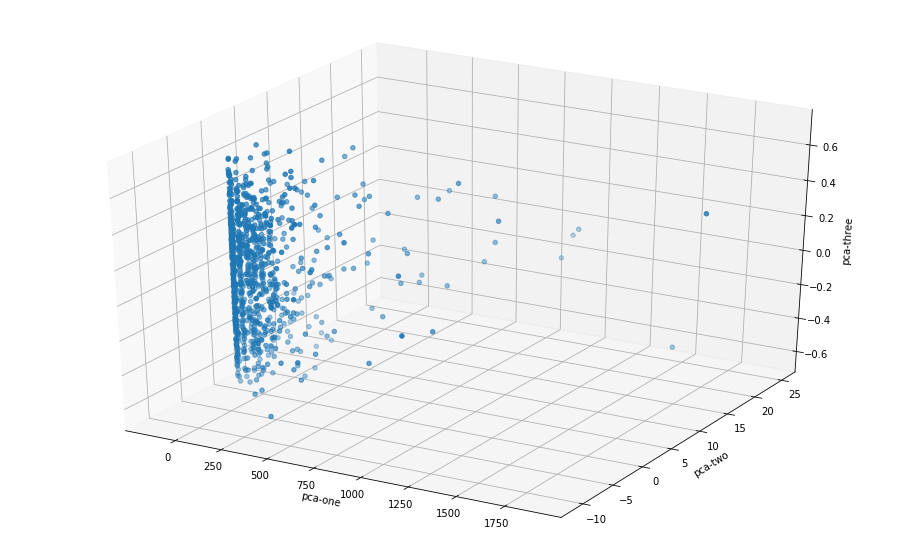

In [57]:
rndperm = list(range(1,1000))

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=segment.loc[rndperm,:]["pca-one"], 
    ys=segment.loc[rndperm,:]["pca-two"], 
    zs=segment.loc[rndperm,:]["pca-three"], 
    
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [58]:
#X = segment

In [59]:
X = segment.drop(['CustomerId','Recency'],axis =1)

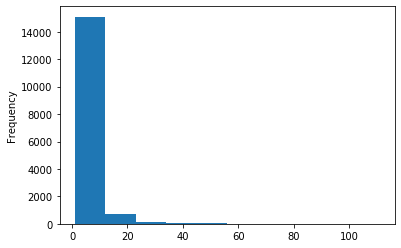

In [60]:
X.Frequency.plot(kind='hist')

In [61]:
X.info()
#нет нулевых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 9 columns):
Monetary     16000 non-null float64
Frequency    16000 non-null int64
factor_1     16000 non-null float64
factor_2     16000 non-null float64
factor_3     16000 non-null float64
factor_4     16000 non-null float64
pca-one      16000 non-null float64
pca-two      16000 non-null float64
pca-three    16000 non-null float64
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


In [62]:
X.describe()
#

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4,pca-one,pca-two,pca-three
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04
mean,129.972264,3.950687,0.500008,0.497864,0.495451,0.498427,-2.249045e-14,5.828671e-16,-3.615164e-18
std,179.809263,5.189864,0.290144,0.291103,0.289034,0.288478,1.798465e+02,3.679961e+00,2.911651e-01
min,0.000000,1.000000,0.000000,0.000000,0.000037,0.000033,-1.300054e+02,-3.618224e+01,-7.054029e-01
25%,20.910000,1.000000,0.250000,0.240000,0.242545,0.248739,-1.090821e+02,-1.024655e+00,-2.166442e-01
50%,59.275000,2.000000,0.500000,0.500000,0.496410,0.498833,-7.073768e+01,-4.424390e-01,-1.836209e-03
75%,170.000000,5.000000,0.750000,0.750000,0.744476,0.747424,3.995939e+01,7.325729e-01,2.187157e-01
max,3040.000000,111.000000,1.000000,1.000000,0.999996,0.999943,2.909894e+03,6.499845e+01,7.157139e-01


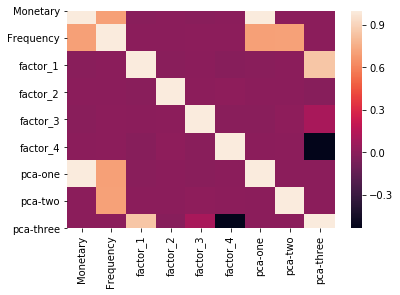

In [63]:

sns.heatmap(X.corr(),xticklabels=X.columns,yticklabels=X.columns)

In [64]:
X_pca = X.loc[:,'pca-one':'pca-three']

In [65]:
X_pca

,pca-one,pca-two,pca-three
0,-29.524428,2.651029,-0.354912
1,40.020444,-0.764847,0.189521
2,-59.168290,3.253942,0.596347
3,-54.837761,7.167088,0.128288
4,-35.433566,1.771179,0.204910
...,...,...,...
15995,-19.946769,1.455070,0.000836
15996,45.121177,4.131190,0.340776
15997,-35.794556,-1.222443,-0.170451
15998,-126.656087,-0.373404,0.121687


In [66]:
# определяем количество кластеров
n_clusters=15
val_clusters=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_pca)
    val_clusters.append(kmean.inertia_)  
    
#kmean.inertia_ Сумма квадратов расстояний до ближайшего центра кластера

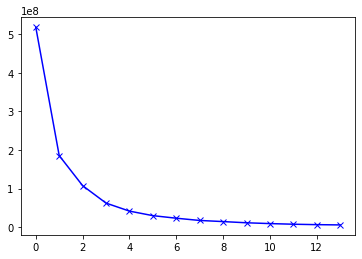

In [67]:
plt.plot(val_clusters, 'bx-')

#можно поделить на 3 или 4 кластера

In [68]:
# 3 кластера
kmean= KMeans(3)
kmean.fit(X_pca)
labels=kmean.labels_
clusters=pd.concat([X, pd.DataFrame({'cluster_KMeans':labels})], axis=1)
clusters.head()

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4,pca-one,pca-two,pca-three,cluster_KMeans
0,100.40,6,0.35,0.08,0.609740,0.949383,-29.524428,2.651029,-0.354912,1
1,170.00,4,0.66,0.16,0.942272,0.479846,40.020444,-0.764847,0.189521,1
2,70.75,6,0.92,0.20,0.323030,0.007076,-59.168290,3.253942,0.596347,1
3,75.00,10,0.35,0.78,0.876833,0.088974,-54.837761,7.167088,0.128288,1
4,94.51,5,0.51,0.44,0.912099,0.206194,-35.433566,1.771179,0.204910,1


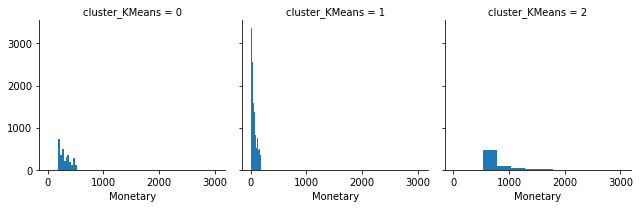

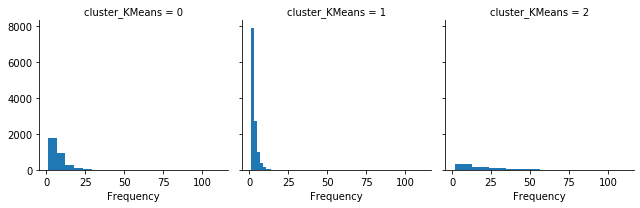

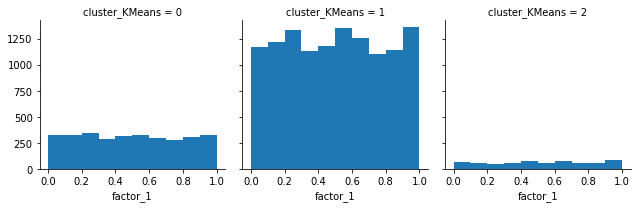

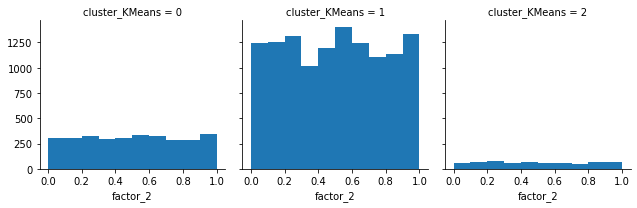

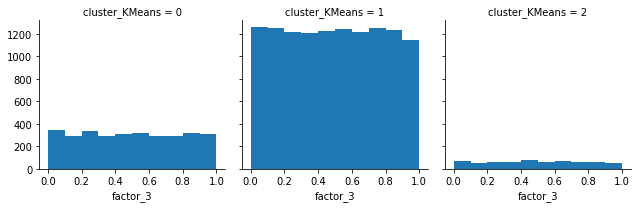

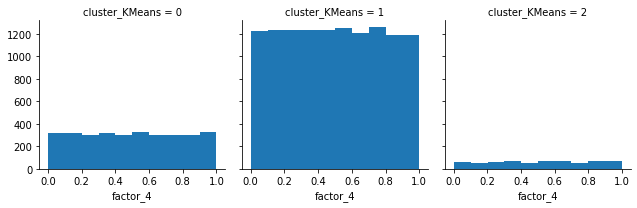

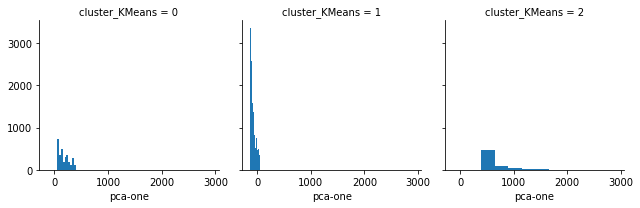

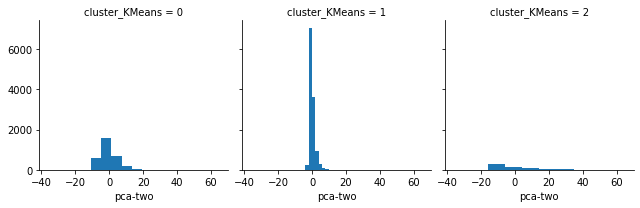

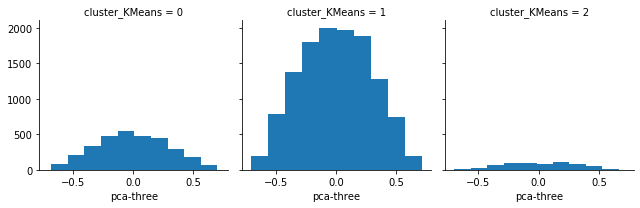

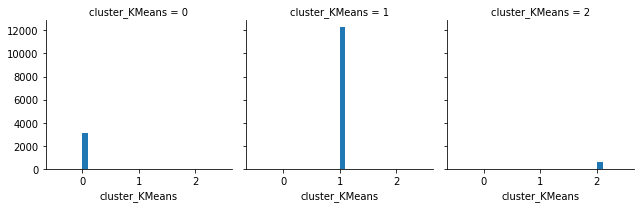

In [69]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster_KMeans')
    grid.map(plt.hist, c)

In [ ]:
#В каждом из получившихся кластеров факторы 1-4 почти равномерно распределены от 0 до 1
# напрашивается вывод о том что эти фичи не несут информации

In [70]:
clusters.cluster_KMeans.value_counts()

1    12254
0     3114
2      632
Name: cluster_KMeans, dtype: int64

In [ ]:
#

In [91]:
clusters.groupby('cluster_KMeans').agg({'Monetary': ['min', 'max','mean','median', 'sum'], 'Frequency': ['min', 'max','mean','median']})

Monetary                                         Frequency  \
                    min      max        mean  median        sum       min   
cluster_KMeans                                                              
0                181.49   525.92  309.352906  280.00  963324.95         1   
1                  0.00   180.46   52.788170   39.75  646866.24         1   
2                528.07  3040.00  742.666187  640.00  469365.03         2   

                                       
                max       mean median  
cluster_KMeans                         
0                57   7.246307      6  
1                20   2.471683      2  
2               111  16.389241     11

In [86]:
mean_stats=clusters.groupby('cluster_KMeans').agg('mean').drop(['pca-one','pca-two','pca-three'], axis = 1)
    


In [87]:
mean_stats

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4
cluster_KMeans,,,,,,
0,309.352906,7.246307,0.491737,0.499367,0.493238,0.498443
1,52.788170,2.471683,0.501189,0.497745,0.496200,0.497719
2,742.666187,16.389241,0.517864,0.492753,0.491824,0.512074


In [88]:
# средняя покупка по каждому кластеру
mean_stats['each'] = mean_stats['Monetary']/mean_stats['Frequency']

In [89]:
mean_stats

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4,each
cluster_KMeans,,,,,,,
0,309.352906,7.246307,0.491737,0.499367,0.493238,0.498443,42.691112
1,52.788170,2.471683,0.501189,0.497745,0.496200,0.497719,21.357179
2,742.666187,16.389241,0.517864,0.492753,0.491824,0.512074,45.314253


In [93]:
# кластер 0 : 3114 человек. "середнячки" принесли наибольшее количество денег - 963324.
# средняя покупка - 42.6, в среднем - 7 покупок
#
# кластер 1 : 12254 человек. "эконом" вторая позиция по общей сумме денег - 646866.
# очень низкая средняя покупка - 21.3, в среднем - 2.5 покупок
#
# кластер 1 : 12254 человек. "шопоголики" третья позиция по общей сумме денег - 469365.
# средняя покупка чуть выше кластера 0 - 45.3, значительно больше всех покупок - 16.3 покупок 
#
#
#
#

In [95]:
#PCA в 2d
pca = PCA(2)
pca.fit(X_pca)
X_PCA2d = pca.transform(X_pca)
X_PCA2d.shape

(16000, 2)

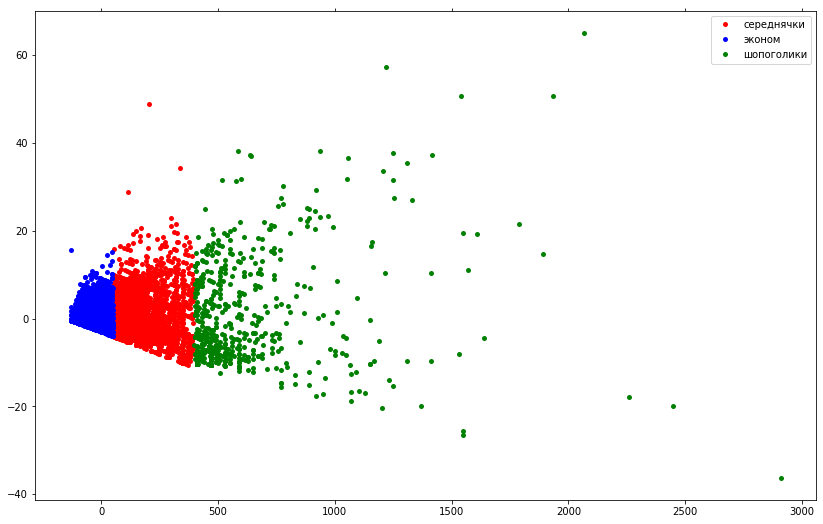

In [98]:
x, y = X_PCA2d[:, 0], X_PCA2d[:, 1]

colors = {0: 'red', 1: 'blue', 2: 'green'}

names = {0: 'середнячки', 1: 'эконом', 2: 'шопоголики'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(14, 9)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
plt.show()